In [34]:
function derivative(f, epsilon=1e-9)
    x -> (f(x + epsilon) - f(x)) / epsilon
end

derivative (generic function with 2 methods)

In [35]:
function newton_raphson(f, x0, max=1000, tol=1e-9)
    guess = x0
    df = derivative(f)
    
    for i in 1:max
        error = f(guess)
        if abs(error) < tol
            return guess
        end
        
        guess = guess - f(guess) / df(guess)
    end
    
    return guess
end

newton_raphson (generic function with 3 methods)

In [36]:
function secant(f, x0, x1, max=1000, tol=1e-9)
    zero = x0
    
    for _ in 1:max
        fx0, fx1 = f(x0), f(x1)
        zero = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        err = f(zero)
        if abs(err) < tol
            return zero
        end
        
        x0 = x1
        x1 = zero
    end
    
    return zero
end

secant (generic function with 3 methods)

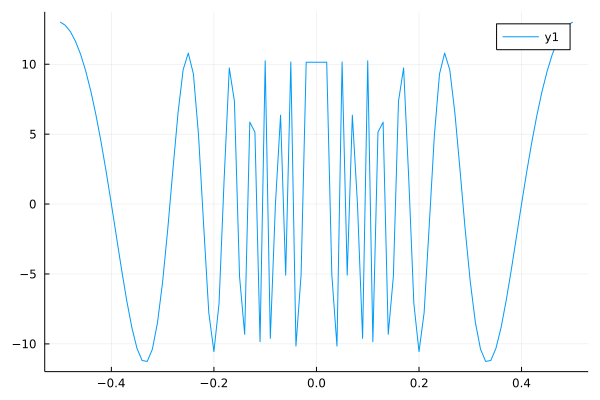

In [37]:
using Plots

f(x) = 10.14 * exp(x^2) * cos(pi/x)
plot([x for x in -.5:.01:.5 if x != 0], f)

In [38]:
function newton_raphson_tab(f, x0, max=1000, tol=1e-9)
    df = derivative(f)
    
    tab = Matrix(undef, 0, 3)
    guess = x0
    
    for i in 1:max
        error = f(guess)
        tab = [tab; i guess error]
        
        if abs(error) < tol
            return tab
        end
        
        guess = guess - f(guess) / df(guess)
    end
    
    return tab
end

newton_raphson_tab (generic function with 3 methods)

In [39]:
function secant_tab(f, x0, x1, max=1000, tol=1e-9)
    tab = Matrix(undef, 0, 3)
    zero = x0
    
    for i in 1:max
        fx0, fx1 = f(x0), f(x1)
        zero = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        err = f(zero)
        
        tab = [tab; i zero err]
        
        if abs(err) < tol
            return tab
        end
        
        x0 = x1
        x1 = zero
    end
    
    return tab
end

secant_tab (generic function with 3 methods)